# Step 1: Play Around with Embedding

- Twitch-specific embedding from https://github.com/konstantinkobs/emote-controlled

In [2]:
import gensim
from pathlib import Path
import csv
import datetime
import os
from pprint import pprint

In [3]:
model = gensim.models.word2vec.Word2Vec.load('embedding/embedding') # Download this by following the instructions in https://github.com/konstantinkobs/emote-controlled
wv = model.wv
del model

In [3]:
# Examples from https://github.com/konstantinkobs/emote-controlled/blob/master/query_embedding.py

print("Detection of the odd word")
print("=========================")
print("youtube, twitch, instagram:")
pprint(wv.doesnt_match("youtube twitch instagram".split(" ")))
print("\n")

###############################################
## Task 2: Words that fit in a given context ##
###############################################

print("Words that fit in a given context")
print("=================================")
print("monday, tuesday, wednesday:")
pprint(wv.most_similar_cosmul("monday tuesday wednesday".split(" ")))
print("\n")

############################
## Task 3: Word relations ##
############################

print("Word relations")
print("==============")
print("Man relates to Woman as King to ...:")
pprint(wv.most_similar_cosmul(positive=['king', 'woman'], negative=['man']))
print("\n")

###################################
## Task 4: Emote intensification ##
###################################

print("Emote intensifications")
print("======================")
print("LUL relates to OMEGALUL as FeelsGoodMan to ...:")
pprint(wv.most_similar_cosmul(positive=['OMEGALUL', 'FeelsGoodMan'], negative=['LUL']))

Detection of the odd word
youtube, twitch, instagram:


/Users/shoyayoshida/opt/anaconda3/envs/py37/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'instagram'


Words that fit in a given context
monday, tuesday, wednesday:
[('thursday', 0.957784116268158),
 ('saturday', 0.9165282249450684),
 ('sunday', 0.907137393951416),
 ('friday', 0.8335966467857361),
 ('tomorrow', 0.7105388045310974),
 ('thurs', 0.6839190721511841),
 ('2pm', 0.6446587443351746),
 ('wed', 0.6399438977241516),
 ('fridays', 0.6398335695266724),
 ('thursdays', 0.6396904587745667)]


Word relations
Man relates to Woman as King to ...:
[('queen', 0.9875077605247498),
 ('princess', 0.9762540459632874),
 ('prince', 0.9511711597442627),
 ('murderer', 0.9334142208099365),
 ('shepard', 0.9321715831756592),
 ('goddess', 0.9280776977539062),
 ('lizard', 0.9277330636978149),
 ('lion', 0.9205520749092102),
 ('crow', 0.9201782941818237),
 ('bird', 0.9195780158042908)]


Emote intensifications
LUL relates to OMEGALUL as FeelsGoodMan to ...:
[('feelsamazingman', 0.9217232465744019),
 ('and', 0.8582755327224731),
 ('Clap', 0.856436550617218),
 ('also', 0.8555846810340881),
 ('F

In [48]:
wv.most_similar_cosmul(positive=['Pog'])

[('pagchomp', 0.9152676463127136),
 ('POGGERS', 0.891425371170044),
 ('pogu', 0.8613439202308655),
 ('pog', 0.854174017906189),
 ('OMEGALUL', 0.852812647819519),
 ('forsen', 0.843866229057312),
 ('LULW', 0.8396608829498291),
 ('😡', 0.8323566913604736),
 ('and', 0.8260712027549744),
 ('.', 0.8258836269378662)]

# Step 2: Clustering 

Chat Messages Downloaded: 
- Riot Games (LoL)
    - https://www.twitch.tv/videos/770925254?filter=all&sort=views
    - https://www.twitch.tv/videos/756260657?filter=all&sort=views
    
- xQcOW (MineCraft)
    - https://www.twitch.tv/videos/911761347?filter=all&sort=views 
    - https://www.twitch.tv/videos/893334860?filter=all&sort=views 
    
- Sykkuno (Among Us, Valorant)
    - https://www.twitch.tv/videos/894695595?filter=all&sort=views
    - https://www.twitch.tv/videos/914368342?filter=all&sort=views
    

- The original paper used streams from forsen, moonmoon_ow, riotgames, sodapoppin, and xqcow for their task of sentiment analysis. 

Clustering: 
    
- We will use HDBSCAN since it doesn't require a pre-decided number of clusters, and it is very efficient (all the other ones take a millenium to finish). 

In [1]:
import sys
sys.path.append("../utils") 
from twitch_tokenizer import TwitchTokenizer
from srt import srt2df
import os 
import numpy as np 
import pandas as pd 

In [13]:
data_dir = '../data/chat'
for channel in os.listdir(data_dir):
    if channel != '.DS_Store':
        for srt_file in os.listdir(os.path.join(data_dir,channel)):
            if srt_file != '.DS_Store':
                df = srt2df(os.path.join(data_dir,channel,srt_file))
                print(channel,srt_file, df.shape[0])

riot_games_LoL 756260657.srt 88886
riot_games_LoL 770925254.srt 94732
xQcOW_minecraft 911761347.srt 293815
xQcOW_minecraft 893334860.srt 299324
sykkuno_amongus_valorant 894695595.srt 75665
sykkuno_amongus_valorant 914368342.srt 97726


In [4]:
df = srt2df('../data/chat/riot_games_LoL/756260657.srt')
df

,message,start_time
0,PauseChamp,00:00:08.310000
1,catJAM catJAM catJAM catJAM catJAM catJAM catJ...,00:00:09.845000
2,STARTFARM BBY,00:00:18.481000
3,aqyyyye,00:00:32.686000
4,FIRST,00:00:36.784000
...,...,...
89719,@Azufre23 Well TSM and TL might make it out,07:38:42.115000
89720,even when lck doesn't win worlds they still us...,07:38:46.566000
89721,IF YOU WOULD BE SO ENTUSIASM FOR WORLD HUNGER ...,07:38:47.159000
89722,♿ MAKE WAY NA PASSING BY ♿ DIDN'T GET OUT OF G...,07:38:48.241000


In [26]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, OPTICS
import hdbscan

class ChatVisualizer:
    def __init__(self,srt_paths,wv):
        self.srt_paths = srt_paths
        self.wv = wv 
        self.tokenizer = TwitchTokenizer()
        self.clusterer = hdbscan.HDBSCAN(min_samples=20)
        
        self.embeddings = [] 
        self.messages_processed = [] 
        
        self._process_messages()
        self._process_embedding()
        self._cluster_embedding()
        self._visualize_embedding()
        
    def _process_messages(self):
        print("Processing Messages...")
        seen_messages = set()
        for srt_path in self.srt_paths:
            print("Reading in {}".format(srt_path))
            df = srt2df(srt_path)
            for message in tqdm(df['message'].values):
                msg_tmp = [] 
                embeddings_tmp = []
                for token in self.tokenizer.tokenize(message):
                    if token in wv:
                        msg_tmp.append(token)
                        embeddings_tmp.append(wv['token'])
    
                if len(msg_tmp) > 0:
                    msg_concat = ' '.join(msg_tmp)
                    if msg_concat not in seen_messages:
                        self.messages_processed.append(' '.join(msg_tmp))
                        self.embeddings.append(np.mean(embeddings_tmp,axis=0))            
                        seen_messages.add(msg_concat)
        self.embeddings = np.stack(self.embeddings)
        print("Embedding: {}".format(self.embeddings.shape))
        
    def _process_embedding(self):
        print("Projecting Embedding into 2D...")
        pca = PCA(n_components=2)
        self.embeddings2d = StandardScaler().fit_transform(pca.fit_transform(self.embeddings))
        
    def _cluster_embedding(self):
        print("Clustering Messages...")
        self.clusterer.fit(self.embeddings2d)
    
    def _visualize_embedding(self):
        print("Visualizing...")
        fig, ax = plt.subplots(figsize=(8,8))
        ax.scatter(self.embeddings2d[:,0],self.embeddings2d[:,1],c=self.clusterer.labels_)
        plt.show();
                
                
        

Processing Messages...
Reading in ../data/chat/riot_games_LoL/756260657.srt


100%|██████████| 88886/88886 [00:09<00:00, 9778.49it/s] 


Reading in ../data/chat/riot_games_LoL/770925254.srt


100%|██████████| 94732/94732 [00:06<00:00, 13825.13it/s]


Embedding: (68237, 128)
Projecting Embedding into 2D...
Clustering Messages...
Visualizing...


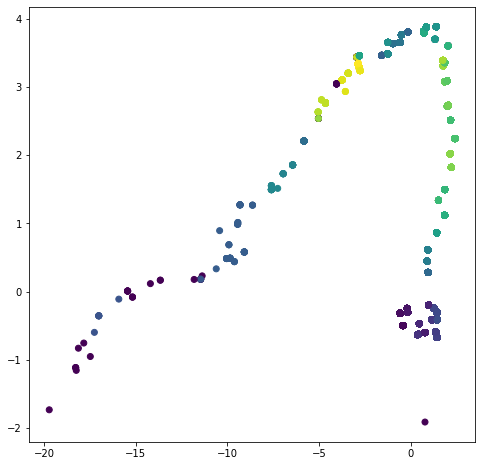

In [27]:
vis1 = ChatVisualizer(['../data/chat/riot_games_LoL/756260657.srt','../data/chat/riot_games_LoL/770925254.srt' ],wv);

Processing Messages...
Reading in ../data/chat/xQcOW_minecraft/893334860.srt


100%|██████████| 299324/299324 [00:14<00:00, 20714.84it/s]


Reading in ../data/chat/xQcOW_minecraft/911761347.srt


100%|██████████| 293815/293815 [00:15<00:00, 19396.98it/s]


Embedding: (181067, 128)
Projecting Embedding into 2D...
Clustering Messages...
Visualizing...


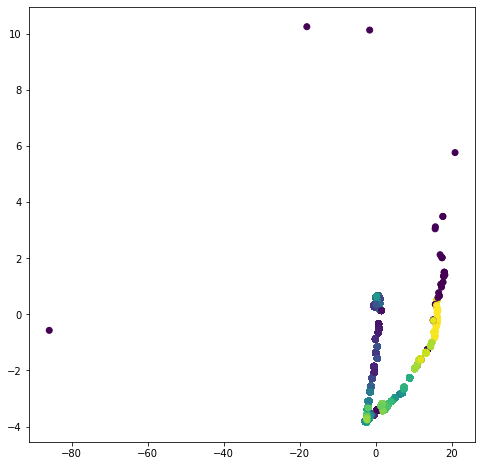

In [28]:
vis2 = ChatVisualizer(['../data/chat/xQcOW_minecraft/893334860.srt','../data/chat/xQcOW_minecraft/911761347.srt' ],wv);
